# Motivation: Network Security

By now, you have explored how to peform a simple analysis of a network packet capture. In this hands-on activity, you will explore two network packet captures: (1) A network packet trace containing a network scan. (2) A regular network packet trace with no abnormal or malicious activity.

We will not (yet) apply machine learning models to this data. The purpose of this assignment is to give you more experience manipulating network data, but also to think about the types of features in network security incidents that might lend themselves to automated detection of anomalies and attacks.

## Learning Objectives

By the end of this hands-on assignment, you should learn the following:

1. Gain more experience with network traffic traces.
2. Explore the properties of a "normal" and "abnormal" network traffic trace.
3. Think about how these properties differ, and how you might design an automated detection.

After these steps, we'll be ready to start thinking about the role of machine learning in solving some of these problems.

## Background: Log4j Vulnerability

The Log4j vulnerability is a vulnerability to Apache Web servers that resulted in the ability to execute remote code on the victim computer. After a successful attack, an attacker may also be able to steal data from the victim computer. 

One of the precursors to many remote exploits is a process called *scanning*, whereby an attacker sends traffic to remote destinations on the Internet in an attempt to find vulnerable machines to attack. 

Because the Log4j vulnerability is a remote web server vulnerability, the attack in fact looks like a sequence of web requests, although the sequence will certainly look different than that of a normal web trace.

In addition to the Log4j web trace, I took a short packet trace of web traffic from my home. In this hands-on activity, we'll compare the two and reflect on the differences.

## Part 1: Load and Explore the Traffic Traces

Load the two traffic traces, available in the course Github repository.

### Sanity Checks

Take a quick look at the data to make sure it loaded correctly.

In [66]:
ldf.head(3)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,2021-12-15 15:35:00.237882,zl-lax-us-gp3-wk106b.internet-census.org,91.247.71.198.host.secureserver.net,TCP,74,57468 > 80 [SYN] Seq=0 Win=29200 Len=0 MSS=146...
1,2,2021-12-15 15:35:00.237939,91.247.71.198.host.secureserver.net,zl-lax-us-gp3-wk106b.internet-census.org,TCP,74,"80 > 57468 [SYN, ACK] Seq=0 Ack=1 Win=65160 Le..."
2,3,2021-12-15 15:35:00.249425,zl-lax-us-gp3-wk106b.internet-census.org,91.247.71.198.host.secureserver.net,TCP,66,57468 > 80 [ACK] Seq=1 Ack=1 Win=29312 Len=0 T...


In [67]:
hdf.head(3)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,2022-09-29 20:24:42.043476,192.168.1.58,43.224.186.35.bc.googleusercontent.com,TLSv1.2,109,Application Data
1,2,2022-09-29 20:24:42.056745,43.224.186.35.bc.googleusercontent.com,192.168.1.58,TCP,66,443 > 57256 [ACK] Seq=1 Ack=44 Win=270 Len=0 T...
2,3,2022-09-29 20:24:42.076282,43.224.186.35.bc.googleusercontent.com,192.168.1.58,TLSv1.2,106,Application Data


### Basic Exploration

Explore a few things about the traces to better understand what the data contains:
* How many packets is in each trace?
* What is the duration of each trace?

Sanity checks on the data you load are often some of the more important steps in data acquisition and quality checking. Without good quality data, ... What other "sanity checks can you think of?

### Feature Exploration

You may also wish to explore some other more basic statistics in the trace, such as the following:
* Number of unique destinations
* Distribution of packet length
* Packets of different protocol types

Plot and/or summarize some of these features below.

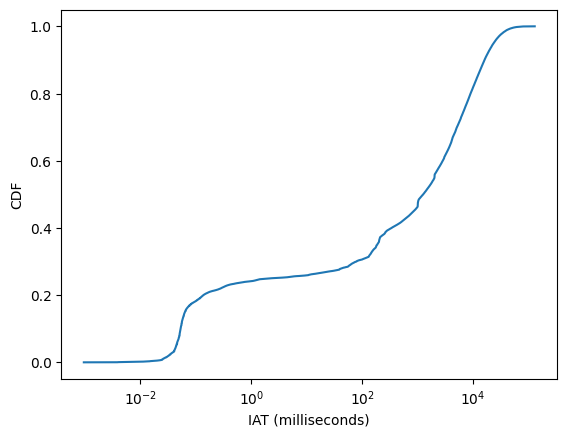

In [76]:
import arrow

ldf['timestamp'] = ldf.apply(lambda row: arrow.get(row['Time']).timestamp(), axis=1)
ldf['iat'] = ldf['timestamp'].diff() * 1000

ldf['iatcdf'] = ldf['iat'].rank(method = 'max', pct = True)
ldf.sort_values('iat').plot(x = 'iat', y = 'iatcdf', grid = False, legend = None)
plt.ylabel('CDF')
plt.xlabel('IAT (milliseconds)')
plt.xscale('log')
plt.show()

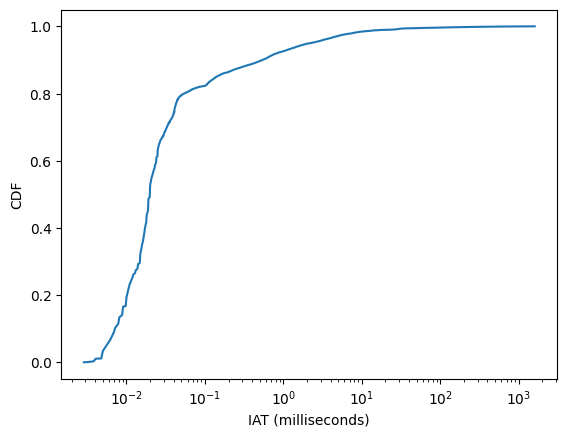

In [77]:
hdf['timestamp'] = hdf.apply(lambda row: arrow.get(row['Time']).timestamp(), axis=1)
hdf['iat'] = hdf['timestamp'].diff() * 1000

hdf['iatcdf'] = hdf['iat'].rank(method = 'max', pct = True)
hdf.sort_values('iat').plot(x = 'iat', y = 'iatcdf', grid = False, legend = None)
plt.ylabel('CDF')
plt.xlabel('IAT (milliseconds)')
plt.xscale('log')
plt.show()

### Thought Question

In general, as we design classification or prediction algorithms, we seek features (and representations of features) that distinguish normal activity from malicious activity. It's important that the features are characteristic of fundamental differences in the two behaviors, rather than simply characteristics of the dataset.

An example of an inappropriate feature, for example, would be the time of day. These two traces were gathered at different dates and times, but normal traffic (and Log4j scans) can occur at any date or time. Thus, time would not make a robust feature. 

Can you think of other features that might separate the two datasets but not make good features?

Which features do you think would make good features? Why or why not?